In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [92]:
pd.set_option('display.max_columns', None)
sns.set_theme()
sns.set_style("darkgrid")

In [93]:
data = pd.read_csv("21_Autism_Prediction.csv")
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [95]:
data['ethnicity'].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [96]:
data['age'] = data['age'].astype(int)

In [97]:
data.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [98]:
for col in data.columns:
    if col not in ['ID', 'age', 'result']:
        print(col)
        print(data[col].unique())
        print("="*50)

A1_Score
[1 0]
A2_Score
[0 1]
A3_Score
[1 0]
A4_Score
[0 1]
A5_Score
[1 0]
A6_Score
[0 1]
A7_Score
[1 0]
A8_Score
[0 1]
A9_Score
[1 0]
A10_Score
[1 0]
gender
['f' 'm']
ethnicity
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
jaundice
['no' 'yes']
austim
['no' 'yes']
contry_of_res
['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']
used_app_bef

In [99]:
data = data.drop(columns = ['ID', 'age_desc'], axis = 1)
data.head(1)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0


In [100]:
map_country = {
    'Viet Nam' : 'VietNam',
    "AmericanSamoa" : 'United States',
    'Hong Kong' : 'China'
}

data['contry_of_res'] = data['contry_of_res'].replace(map_country)


In [101]:
data['ethnicity'] = data['ethnicity'].replace({"others" : "Others", "?" : " Others"})
data['relation'] = data['relation'].replace({"?" : "Others", "Relative" : "Others", "Parent" : "Others", "Health care professional" : "Others"})

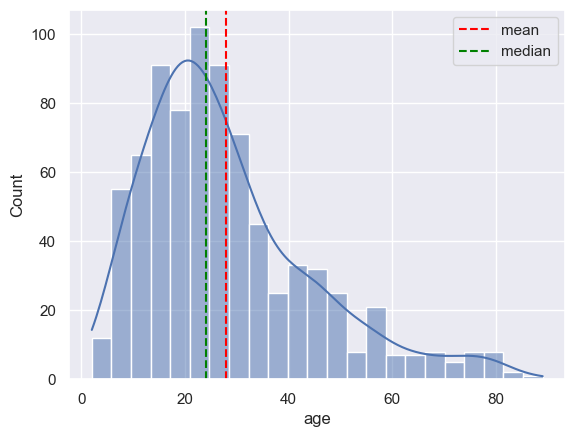

In [102]:
#EDA
sns.histplot(data['age'], kde =True)

plt.axvline(data['age'].mean(), c = 'red', linestyle = '--', label = 'mean')
plt.axvline(data['age'].median(), c = 'green', linestyle = '--', label = 'median')

plt.legend()
plt.show()

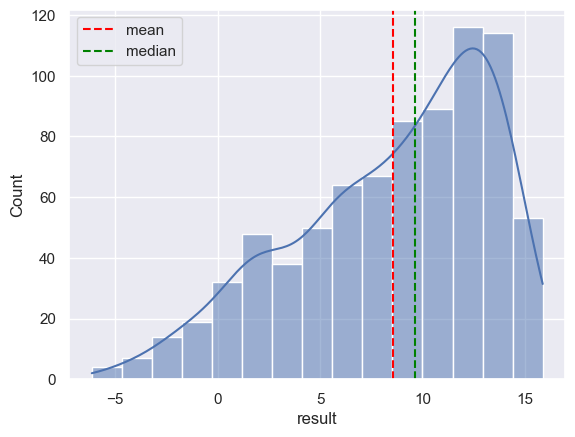

In [103]:
sns.histplot(data['result'], kde =True)

plt.axvline(data['result'].mean(), c = 'red', linestyle = '--', label = 'mean')
plt.axvline(data['result'].median(), c = 'green', linestyle = '--', label = 'median')

plt.legend()
plt.show()

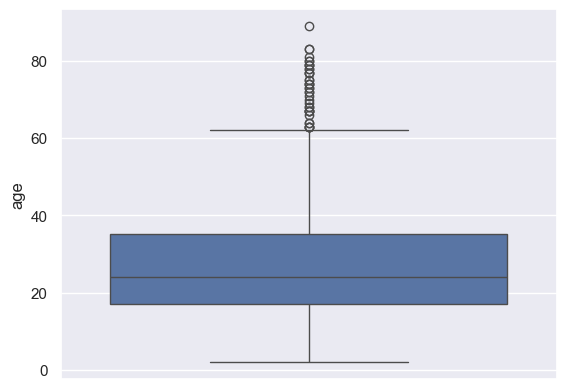

In [104]:
sns.boxplot(data['age'])
plt.show()

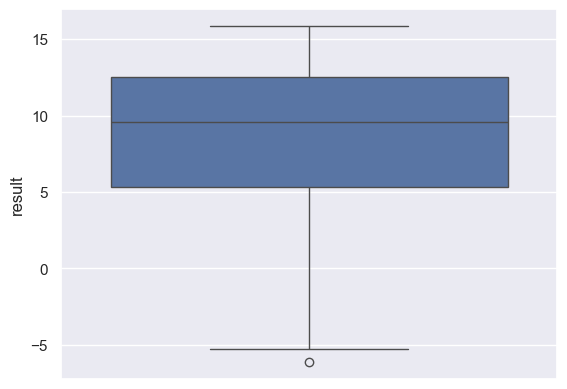

In [105]:
sns.boxplot(data['result'])
plt.show()

In [106]:
#Count the outliers using IQR method
def no_outlier(data, col):
     Q1 = data[col].quantile(0.25)
     Q3 = data[col].quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR

     outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
     print(len(outliers))

In [107]:
no_outlier(data, 'age')
no_outlier(data, 'result')

39
1


In [108]:
catFeatures = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation']

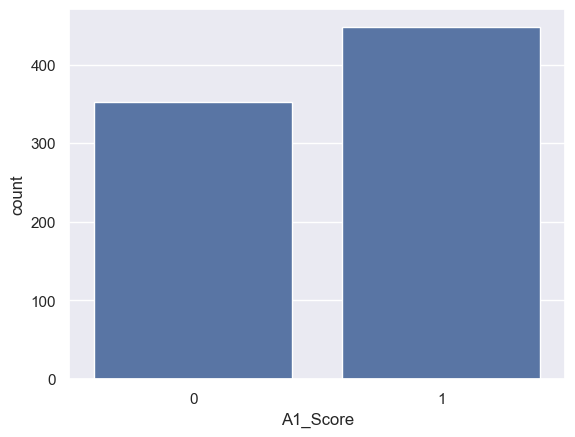

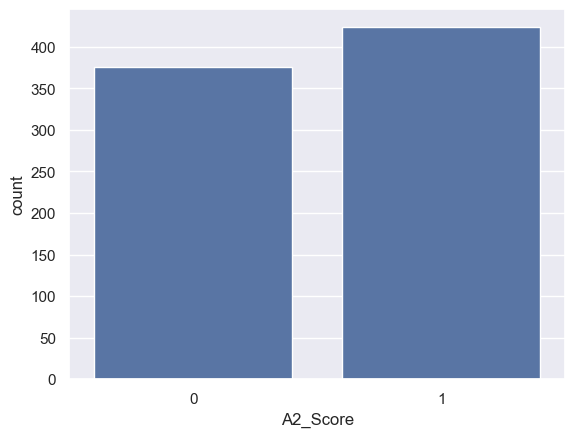

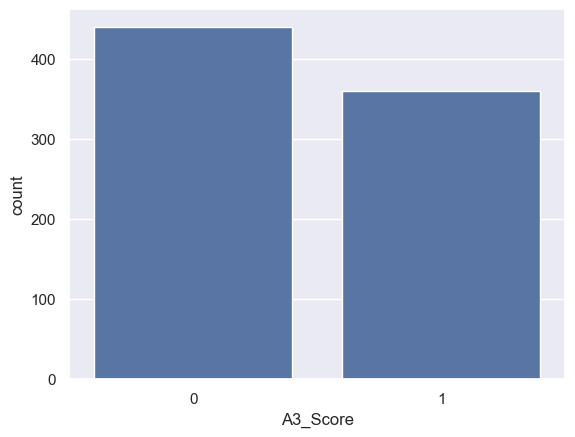

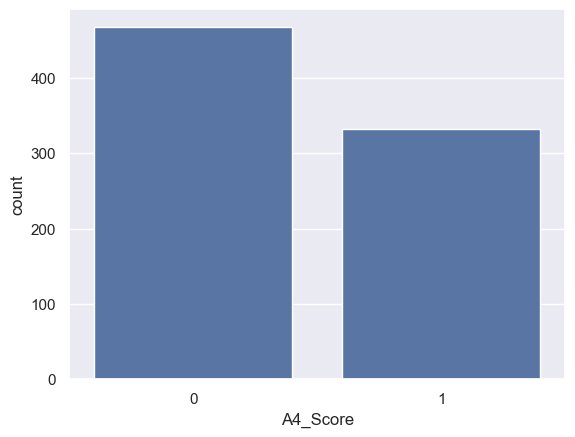

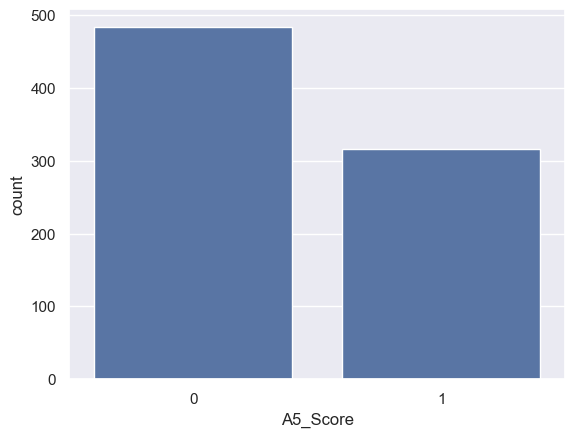

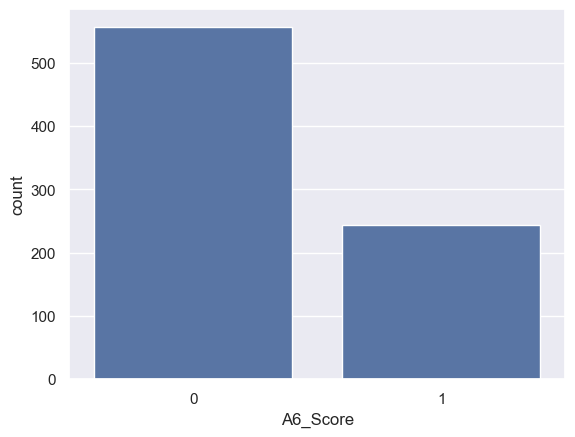

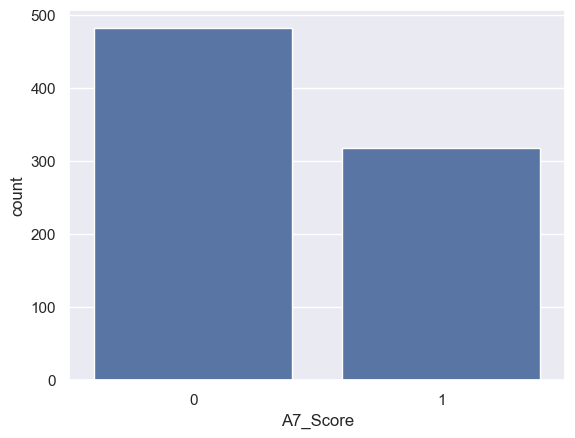

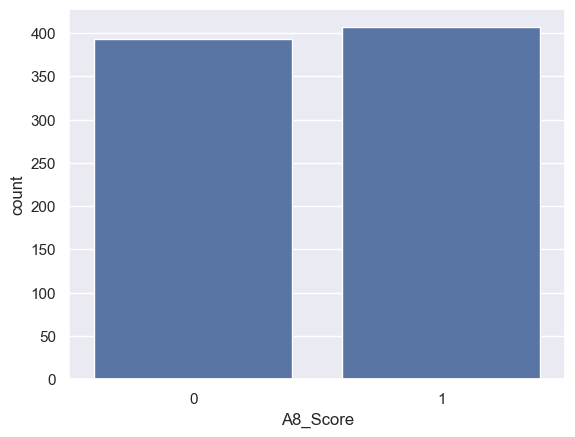

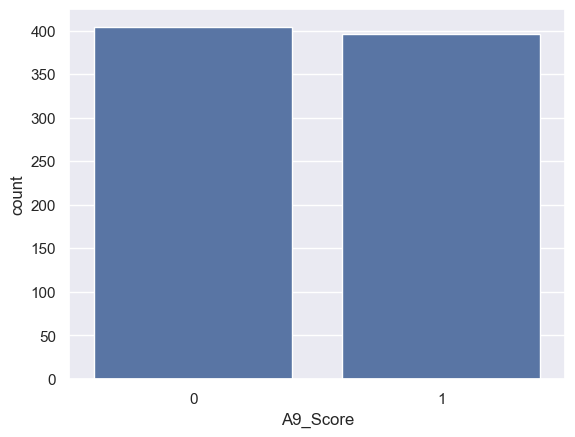

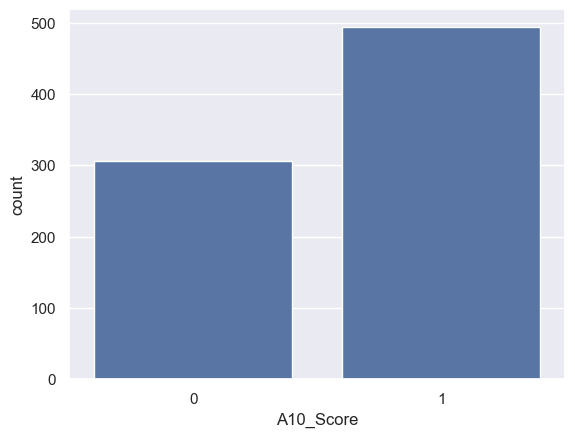

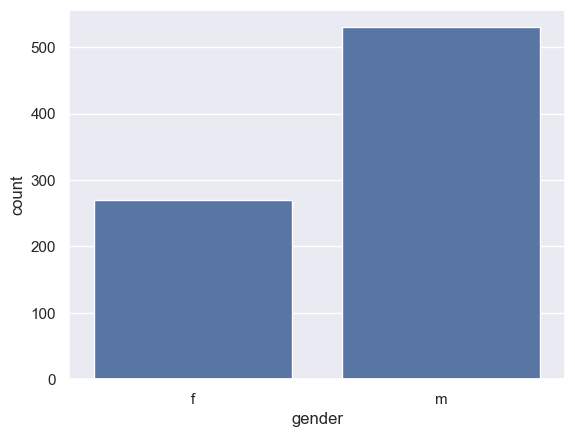

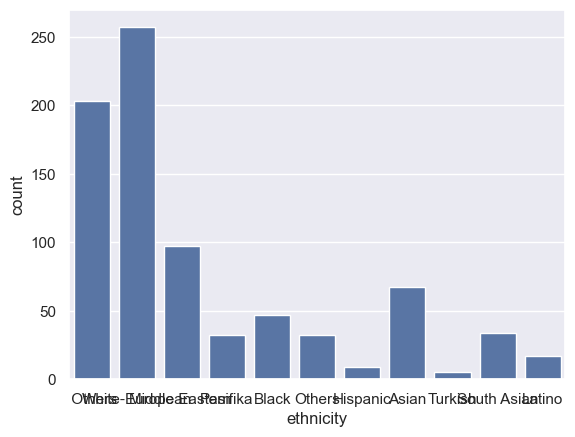

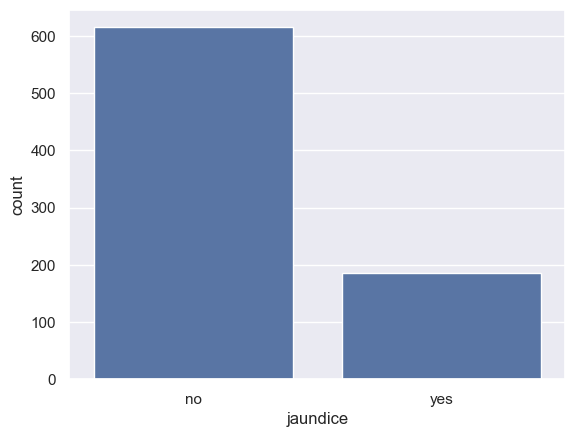

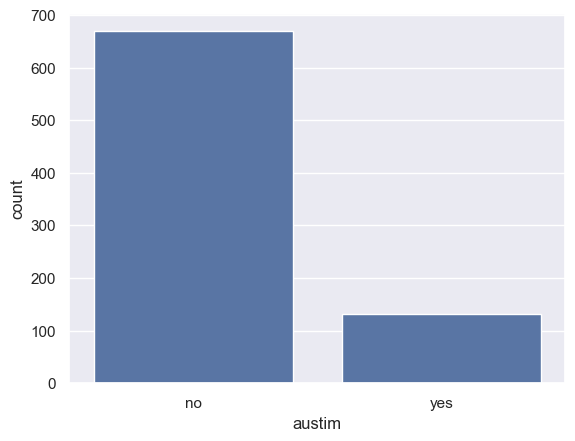

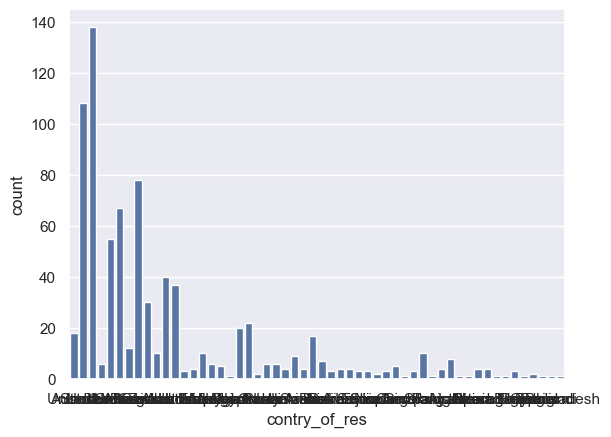

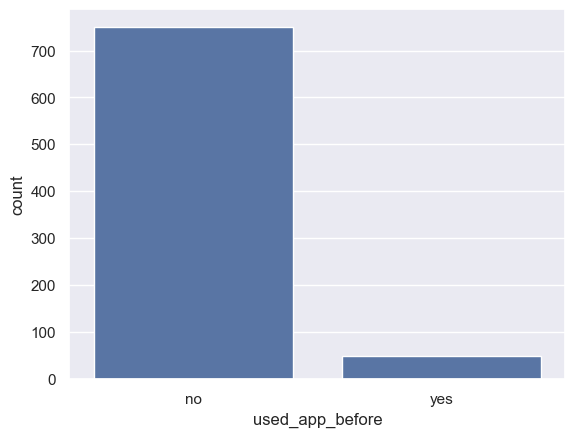

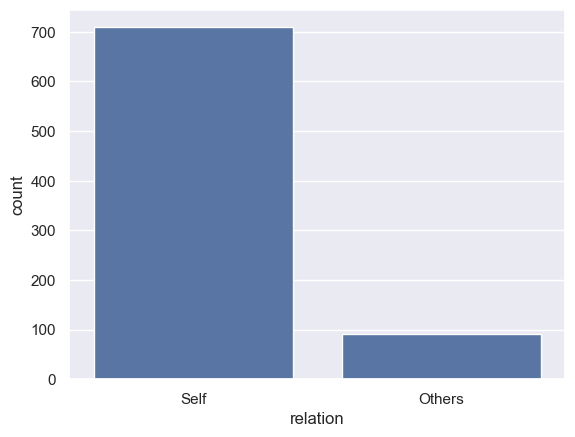

In [109]:
for col in  catFeatures:
    sns.countplot(x = data[col])
    plt.show()

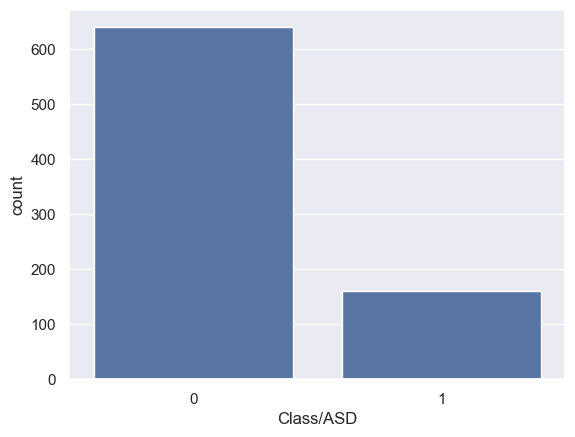

In [110]:
sns.countplot(x = data['Class/ASD'])
plt.show()

In [111]:
objectCol = data.select_dtypes(include = ['object']).columns
objectCol

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [112]:
encoders = {}

In [113]:
for col in objectCol:
    lblEncoder = LabelEncoder()
    data[col] = lblEncoder.fit_transform(data[col])
    encoders[col] = lblEncoder

with open("21_Autism_Prediction_Encoders.pkl", 'wb') as f:
    pickle.dump(encoders, f)
    f.close()

In [114]:
data.head(1)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,0,0,0,6,0,6.351166,1,0


In [115]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

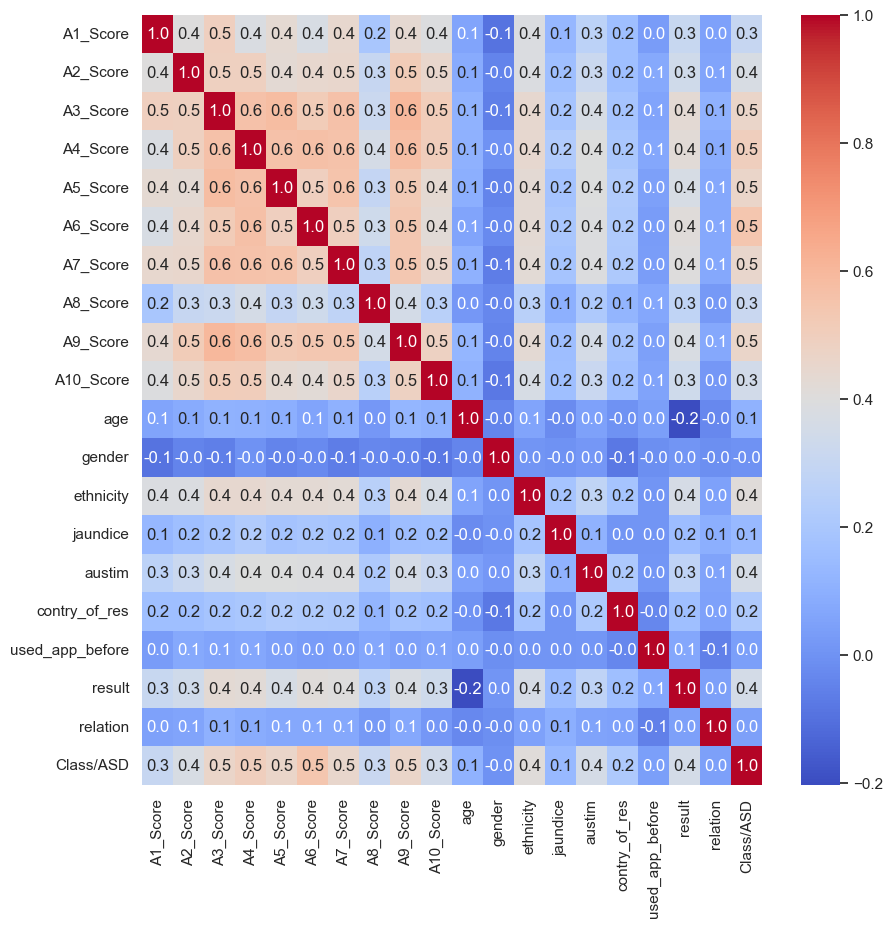

In [116]:
plt.figure(figsize = (10, 10))
sns.heatmap(data = data.corr(), annot = True, cmap = 'coolwarm', fmt = '.1f', cbar = True)
plt.show()

In [117]:
#Data Preprocessing

#Handling outliers
def handling_outlier(data, col):
     Q1 = data[col].quantile(0.25)
     Q3 = data[col].quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR

     medi = data[col].median()

     data[col] = data[col].apply(lambda x: medi if (x < lower_bound or x > upper_bound) else x)

     return data


In [118]:
data = handling_outlier(data, "age")
no_outlier(data, "age")

28


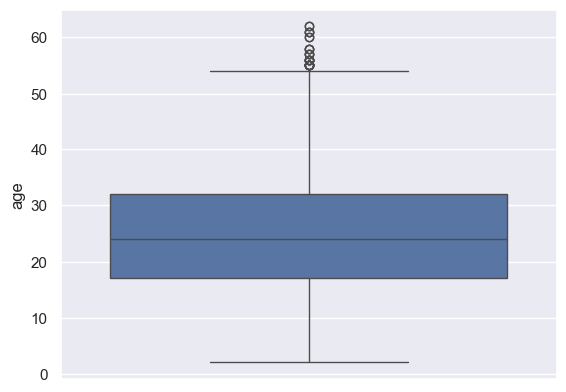

In [119]:
sns.boxplot(data['age'])
plt.show()

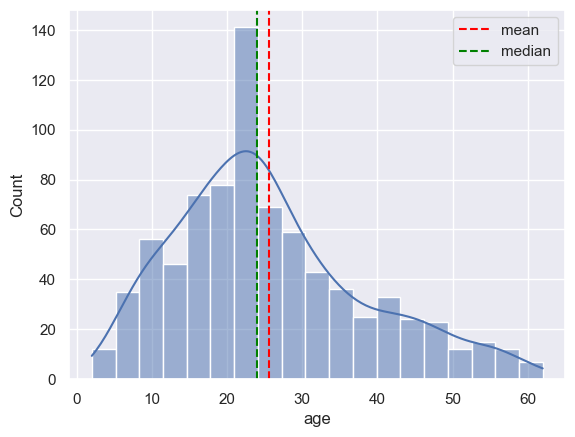

In [120]:
sns.histplot(data['age'], kde =True)

plt.axvline(data['age'].mean(), c = 'red', linestyle = '--', label = 'mean')
plt.axvline(data['age'].median(), c = 'green', linestyle = '--', label = 'median')

plt.legend()
plt.show()

In [121]:
X = data.drop(columns = "Class/ASD", axis = 1)
Y = data['Class/ASD']

In [122]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [123]:
print(xTrain.shape, yTrain.shape)

(640, 19) (640,)


In [124]:
print(yTrain.value_counts())

Class/ASD
0    515
1    125
Name: count, dtype: int64


In [125]:
#SMOTE - Synthetic Minority OverSampling technique

smote = SMOTE(random_state = 42)

In [126]:
xTrainSmote, yTrainSmote = smote.fit_resample(xTrain, yTrain)

In [127]:
yTrainSmote.value_counts()

Class/ASD
1    515
0    515
Name: count, dtype: int64

In [128]:
#Model Training
models = {
    "DecisionTree" : DecisionTreeClassifier(random_state = 42),
    "RandomForest" : RandomForestClassifier(random_state = 42),
    "LogisticRegression" : LogisticRegression(random_state=42, max_iter = 1000)
}

In [129]:
cv_scores = {}

for model_name, model in models.items():
    print("Training ", model_name, " with default params")
    scores = cross_val_score(model, xTrainSmote, yTrainSmote, cv = 5, scoring = 'accuracy')

    cv_scores[model_name] = scores

    print(f"{model_name} Cross Validation Accuracy: {np.mean(scores) : .2f}")
    print("="*50)

Training  DecisionTree  with default params
DecisionTree Cross Validation Accuracy:  0.88
Training  RandomForest  with default params
RandomForest Cross Validation Accuracy:  0.92
Training  LogisticRegression  with default params
LogisticRegression Cross Validation Accuracy:  0.84


In [130]:
#Model Selection and Hyperparamter tuning
dTree = DecisionTreeClassifier(random_state = 42)
rForest = RandomForestClassifier(random_state = 42)
lRegressor = LogisticRegression(random_state = 42)

In [131]:
param_DT = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 10, 20, 50, 70],
    'min_samples_split' : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 5, 7]
}

param_RF = {
    'n_estimators' : [50, 100, 150, 200, 500],
    'max_depth' : [None, 10, 20, 50, 70],
    'min_samples_split' : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 5, 7],
    "bootstrap" : [True, False]
}

param_LR = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [1, 5, 6, 10],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter' : [500, 1000, 1500, 100]
}

In [132]:
DT_rs = RandomizedSearchCV(dTree, param_DT, n_iter = 10, cv = 5, scoring = 'accuracy', random_state = 42)
DT_rs.fit(xTrain, yTrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 50, 70],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [133]:
RF_rs = RandomizedSearchCV(rForest, param_RF, n_iter = 10, cv = 5, scoring = 'accuracy', random_state = 42)
RF_rs.fit(xTrain, yTrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 50, 70],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200,
                                                         500]},
                   random_state=42, scoring='accuracy')

In [134]:
LR_rs = RandomizedSearchCV(lRegressor, param_LR, n_iter = 10, cv = 5, scoring = 'accuracy', random_state = 42)
LR_rs.fit(xTrain, yTrain)

c:\Users\Tarun V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Tarun V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Tarun V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Tarun V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Tarun V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [1, 5, 6, 10],
                                        'max_iter': [500, 1000, 1500, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [135]:
#Best Model

best_model = None
best_score = 0

if DT_rs.best_score_ > best_score:
    best_model = DT_rs.best_estimator_
    best_score = DT_rs.best_score_

if RF_rs.best_score_ > best_score:
    best_model = RF_rs.best_estimator_
    best_score = RF_rs.best_score_

if LR_rs.best_score_ > best_score:
    best_model = LR_rs.best_estimator_
    best_score = LR_rs.best_score_

In [136]:
best_model

RandomForestClassifier(max_depth=50, random_state=42)

In [137]:
best_score

0.865625

In [138]:
with open("21_Autism_Prediction_BestModel.pkl", 'wb') as f:
    pickle.dump(best_model, f)

In [140]:
#Checking for Test data
prediction = best_model.predict(xTest)
print("classification Report: \n", classification_report(yTest, prediction))
print("confusion matrix : \n", confusion_matrix(yTest, prediction))

classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       124
           1       0.71      0.67      0.69        36

    accuracy                           0.86       160
   macro avg       0.81      0.79      0.80       160
weighted avg       0.86      0.86      0.86       160

confusion matrix : 
 [[114  10]
 [ 12  24]]


In [ ]:
#To do use Encoder.pkl and model.pkl